<a href="https://colab.research.google.com/github/Plumz17/CVL_Assignment01/blob/main/CVL_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First Computer Vision Assignment
#Analysis of Image Enhancement Methods - Anders Emmanuel Tan (24/541351/PA/22964)

Description: In this Assignment, I will analyse several Image Enhancement methods for a couple of Images, including:
*   Dark Images (Underexposed)
*   Bright Images (Overexposed)
*   Low Contrast Images
*   Noisy Images
*   Blurry Images

For each of those images, I will implement 2 - 3 Image Enhancement Approaches and we will see which results in the best output within the image types I mentioned. (Note: Since this assignment is similar to the second assignment of my Digital Image Processing course last semester, I will use my previous submission as a base and built upon it by adding and changing some of the implementations)


## 1. Setting Up Image to be Processed
Description: For this first section, we will be preparing the images that will later be processed. Since the uploaded files in Google Colab are only available in the runtime,I will be attaining those files by cloning them from the Github Submission link. Additionaly, we will also be importing the libaries that we will be using for this submission to import and process the images. We will also convert the images into grayscale in order to ease the image enhancement process. Lastly, I will also provide a helper function to help compare the enhanced images with the original.

In [29]:
# Cloning Github Repository to get the Image
!rm -rf CVL_Assignment01
!git clone https://github.com/Plumz17/CVL_Assignment01

Cloning into 'CVL_Assignment01'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 587.02 KiB | 4.02 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [30]:
# Import Important Libraries
import cv2 # For Reading Image
import numpy as np # For Manipulating Image Matrix
import matplotlib.pyplot as plt # For Showing Image
import math # For Math

filename_dark = "/content/CVL_Assignment01/dark.png"
filename_bright = "/content/CVL_Assignment01/bright.jpg"
#filename_low = "/content/CVL_Assignment01/low.png"
#filename_blur = "/content/CVL_Assignment01/blur.png"
#filename_noisy = "/content/CVL_Assignment01/noisy.png"


img_dark = cv2.imread(filename_dark) # Read Image
img_dark = cv2.cvtColor(img_dark, cv2.COLOR_BGR2GRAY) # Change the color map
img_bright = cv2.imread(filename_bright) # Read Image
img_bright = cv2.cvtColor(img_bright, cv2.COLOR_BGR2GRAY) # Change the color map
# img_low = cv2.imread(filename_low)
# img_low = cv2.cvtColor(img_low, cv2.COLOR_BGR2GRAY)
# img_blur = cv2.imread(filename_blur)
# img_blur = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
# img_noisy = cv2.imread(filename_noisy)
# img_noisy = cv2.cvtColor(img_noisy, cv2.COLOR_BGR2GRAY)

In [31]:
def show(before, after, title2= "Enhanced"): # Helper function to check the before and after of the enhancement
  plt.figure(figsize=(10,5))

  # Show original
  plt.subplot(1,2,1)
  plt.imshow(before, cmap='gray', vmin=0, vmax=255) #vmin and max to preserve original image's contrast
  plt.title("Original")
  plt.axis("off")

  # Show processed
  plt.subplot(1,2,2)
  plt.imshow(after, cmap='gray', vmin=0, vmax=255)
  plt.title(title2)
  plt.axis("off")

  plt.show()

## 2. Enhancing Dark Images
Description: In the second segment of this Assingnment, I will be focusing on the Image Enhancement Methods on Images which are too dark. This condition is commonly found in the real world when an image is underexposed or when the enviornment where the image was taken have limited lighting. Three main methods will be implemented for this case:

*   Negative Image Transformation
*   Logarithmic Transformation
*   Gamma Correction (Gamma < 1.0)

(Image Source: https://www.mathworks.com/help/images/learning-to-see-in-the-dark.html)

### 2A. Negative Image Transformation

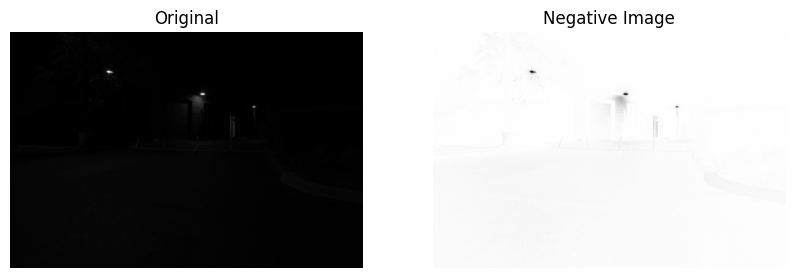

In [32]:
def negative(img):
  out = img.copy()
  L = 256 # max pixel
  for i in range(out.shape[0]): #Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = L - 1 - out[i][j] # Use the formula s = (L - 1) - r, where L is 256 so s = 255 - r
  return out

show(img_dark, negative(img_dark), "Negative Image")

### 2B. Log Transformation

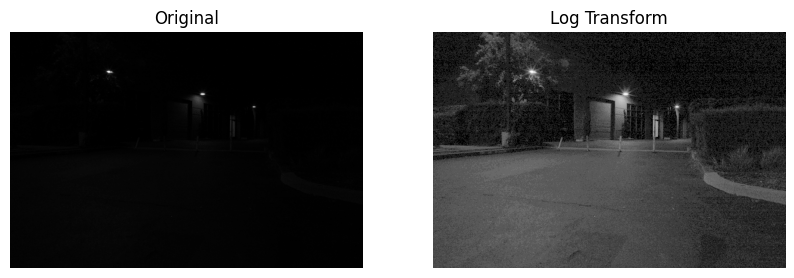

In [33]:
def log_transform(img):
  out = img.copy().astype(float) # So we can handle commas to be log-ed
  R_max = np.max(out)
  L = 256
  c = (L - 1) / np.log(1 + R_max) # Normilize the C to fit (0, 255)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = c * np.log(1 + out[i][j]) #Use the formula s = c * log(1+r)
  return out.astype(np.uint8)

show(img_dark, log_transform(img_dark), "Log Transform")

###2C. Gamma Correction (Gamma < 1)

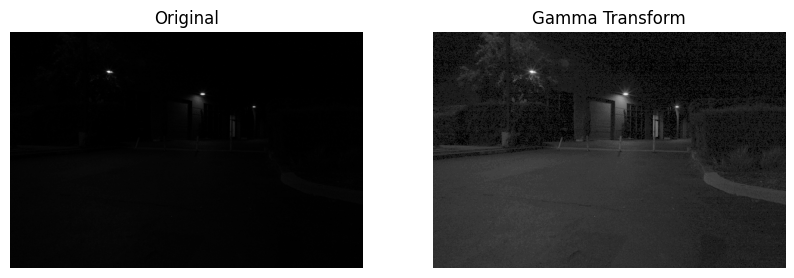

In [46]:
def gamma(img, gamma=0.4):
  out = img.astype(float)
  R_max = np.max(img)
  L = 256
  c = (L - 1) / (R_max ** gamma) # Normilize the C to fit (0, 255)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = c * (img[i][j] ** gamma) # Use the Formula s = c * r ^ gamma
  return out.astype(np.uint8)

show(img_dark, gamma(img_dark), "Gamma Transform")

## 3. Enhancing Bright Images
Description: In this section of the assingment, I will be focusing on Image Enhancement techniques on Images that are too bright. On the contrary to the previous section, this condition happens when an image is overexposed or when the environment where the image was taken has an abundance of light. Three main methods will be implemented for this case:
*   Negative Image Transformation
*   Gamma Correction (Gamma < 1.0)
*   Inverse Log Transformation

Since some of these methods have been implemented in the previous section, I will be reusing their code to save time.

(Image Source: https://photo.stackexchange.com/questions/67848/why-are-all-my-photos-overexposed)

### 3A. Image Negative

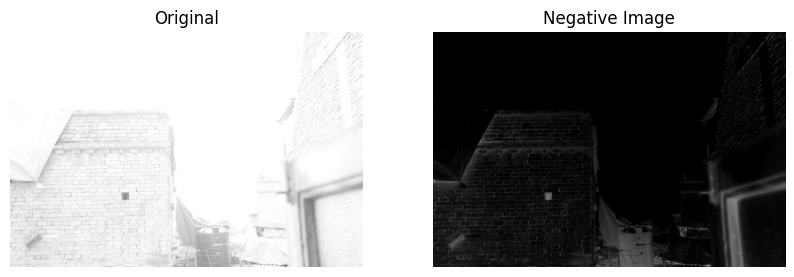

In [35]:
show(img_bright, negative(img_bright), "Negative Image")

### 3B. Gamma Correction (Gamma > 1)

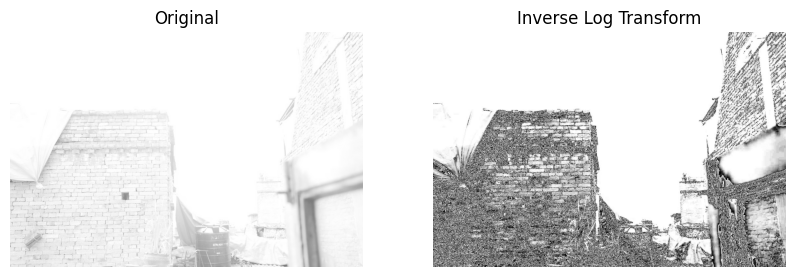

In [47]:
show(img_bright, gamma(img_bright, 2), "Inverse Log Transform")

#3C. Inverse Log Transform

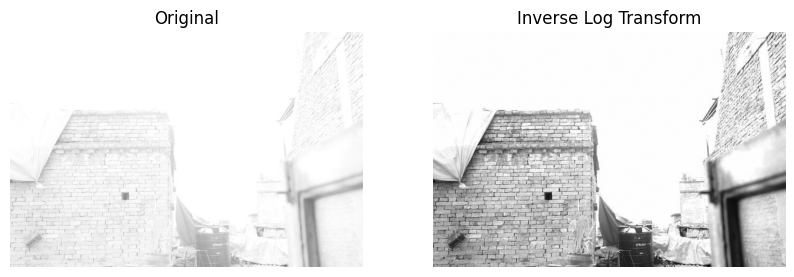

In [51]:
def inverse_log_transform(img):
  out = img.copy().astype(float) # So we can handle commas to be log-ed
  S_max = np.max(out)
  L = 256
  c = (L - 1) / np.log(1 + S_max) # Normilize the C to fit (0, 255)
  for i in range(out.shape[0]):#Iterate for every pixel in the x axis (Reminder that img.shape returns (width, height, channel))
    for j in range(out.shape[1]): #Iterate for every pixel in the y axis
      out[i][j] = math.exp(out[i][j] / c) - 1 #Use the formula r = e^(s/c) - 1 (since this is the inverse of log transform)
  return out.astype(np.uint8)

show(img_bright, inverse_log_transform(img_bright), "Inverse Log Transform")